# 4 Game of Thrones - Inceleme

[Google'da karakter aramalari](https://trends.google.com.tr/trends/explore?date=today%205-y&q=Eddard%20Stark,%2Fm%2F02yxj7t,%2Fm%2F02ntqy8,%2Fm%2F02ntqy0)


5 adet kitabin verisine [adresinden](https://github.com/mathbeveridge/asoiaf/tree/master/data) ulasilabilir.

> This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
kitap1 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv')
kitap2 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book2-edges.csv')
kitap3 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book3-edges.csv')
kitap4 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book4-edges.csv')
kitap5 = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book5-edges.csv')

In [3]:
kitap1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [4]:
kitap1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
Source    684 non-null object
Target    684 non-null object
Type      684 non-null object
weight    684 non-null int64
book      684 non-null int64
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [5]:
len(kitap1)

684

In [6]:
kitap1.Source[0:3]

0       Addam-Marbrand
1       Addam-Marbrand
2    Aegon-I-Targaryen
Name: Source, dtype: object

In [7]:
G1 = nx.Graph(name='Kitap 1') 
for i in range(len(kitap1)):
    G1.add_edge(kitap1.Source[i], kitap1.Target[i],  weight= kitap1.weight[i])

Text(0.5,1,'Kitap 1 - Game of Thrones')

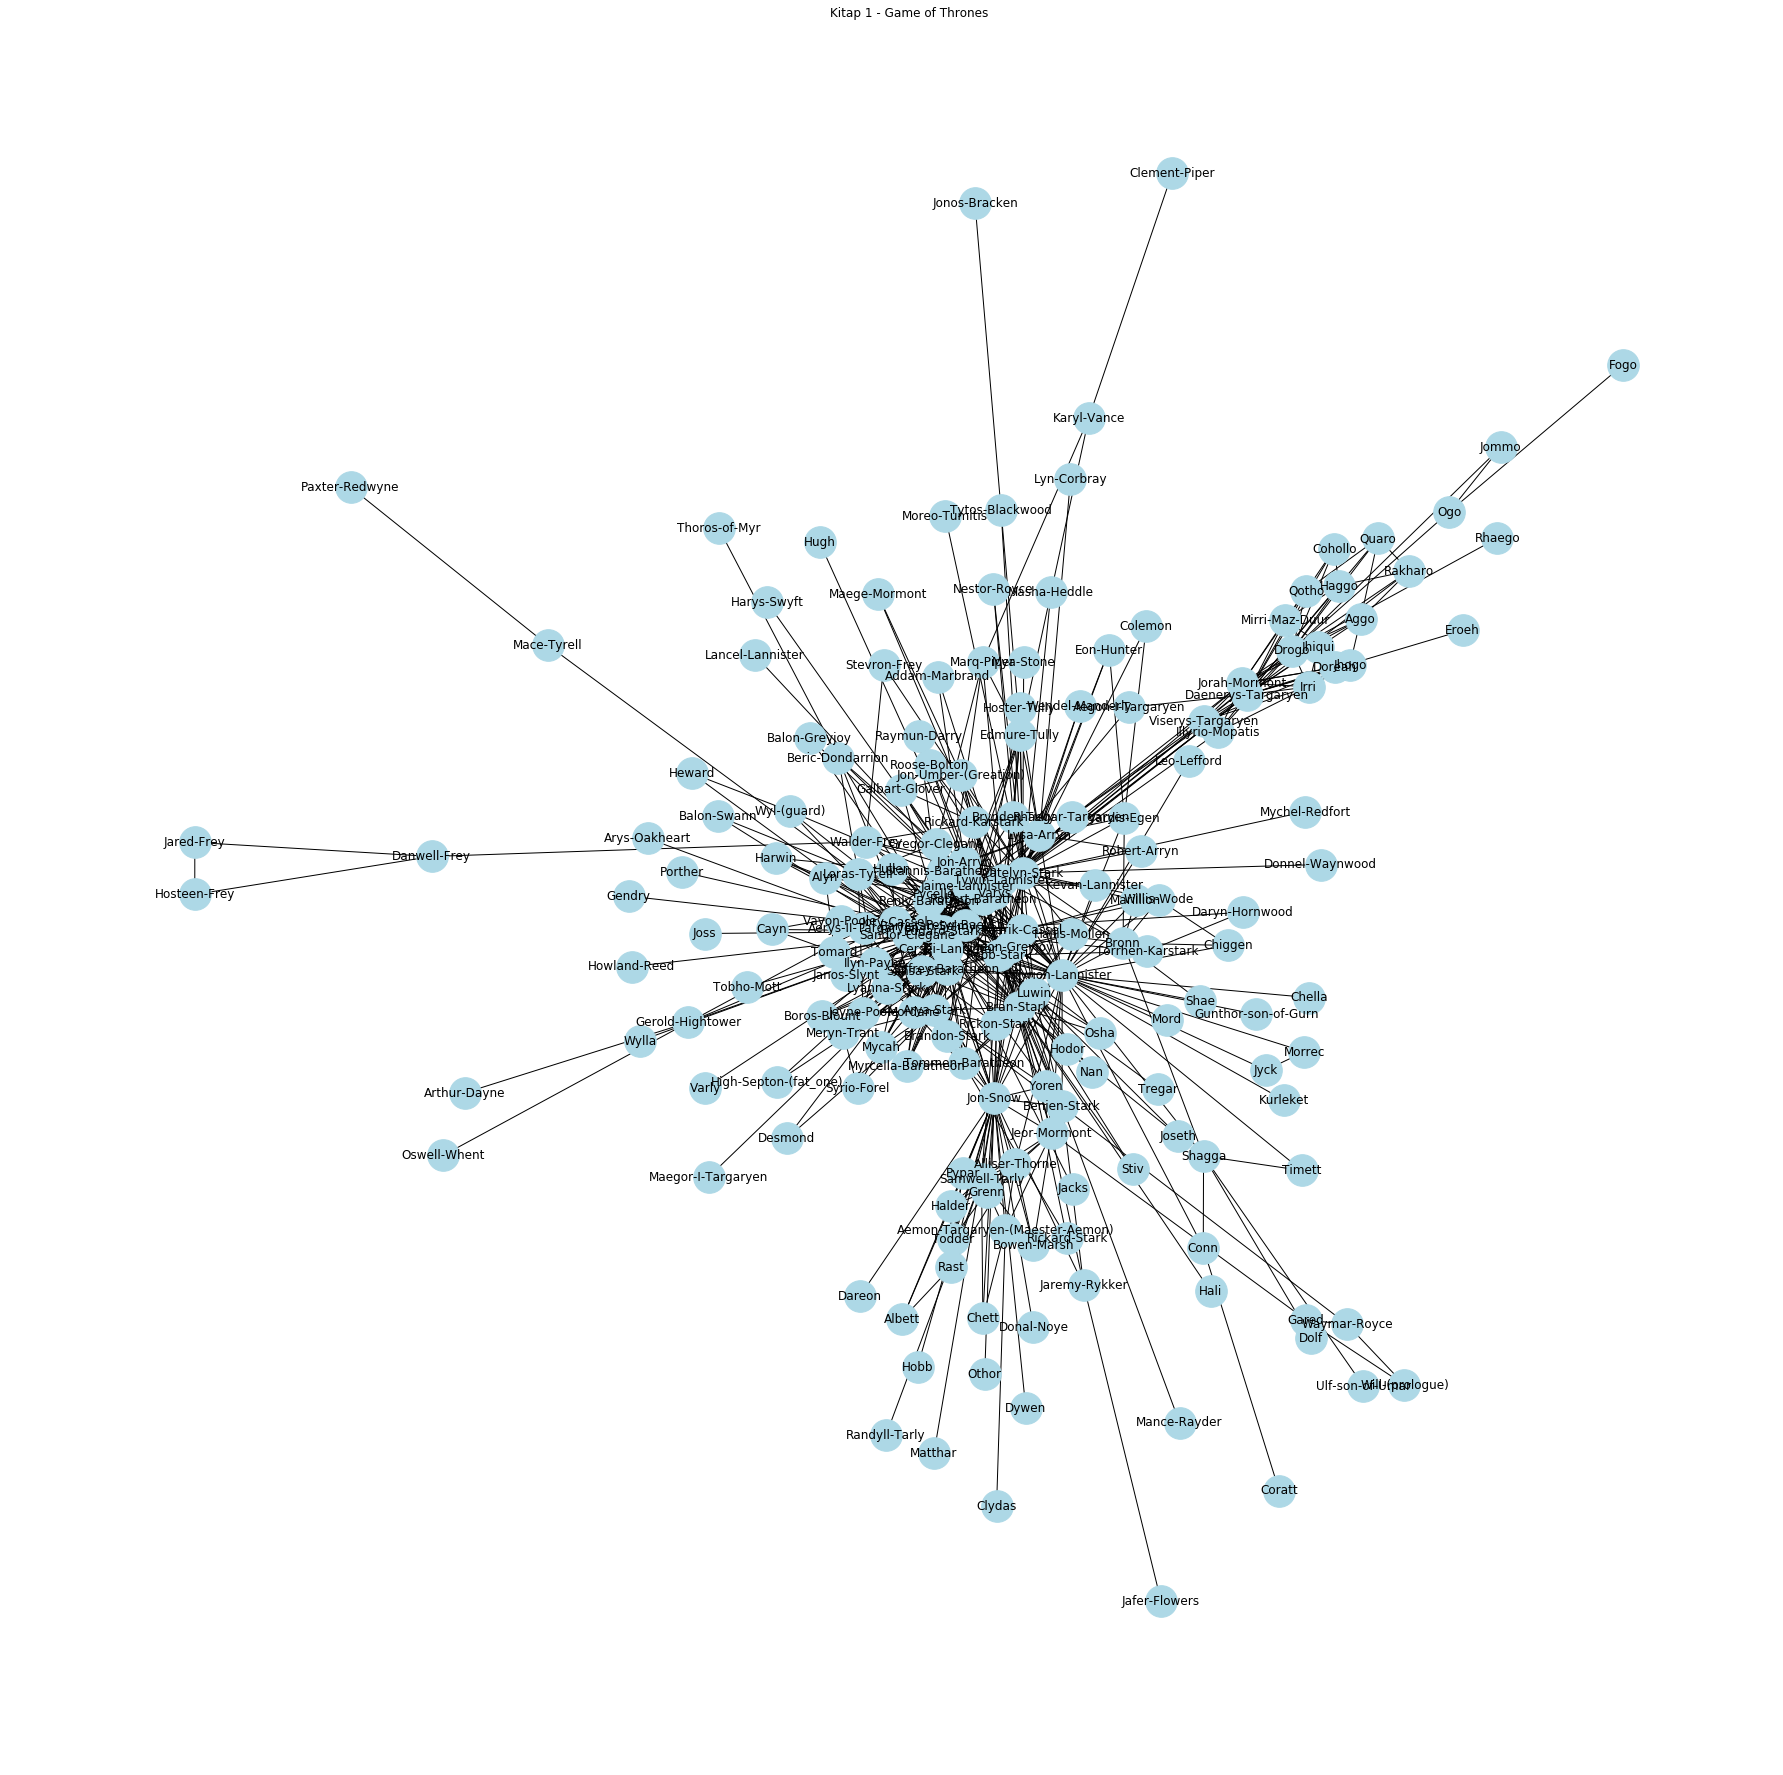

In [8]:
plt.figure(figsize=(24, 24))
pos2=nx.spring_layout(G1,scale=1) 
nx.draw(G1, pos=pos2, node_size=1000, node_color='lightblue', with_labels=True)
plt.title("Kitap 1 - Game of Thrones")

In [9]:
sorted(nx.degree_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

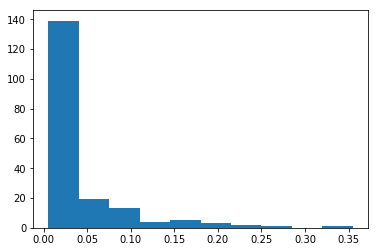

In [10]:
plt.hist(list(nx.degree_centrality(G1).values()))
plt.show()

In [11]:
sorted(nx.pagerank_numpy(G1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.04552079222830664),
 ('Tyrion-Lannister', 0.03301362462493269),
 ('Catelyn-Stark', 0.030193105286631914),
 ('Robert-Baratheon', 0.029834742227736695),
 ('Jon-Snow', 0.02683449952206629),
 ('Robb-Stark', 0.02156294129724754),
 ('Sansa-Stark', 0.020008034042864633),
 ('Bran-Stark', 0.019945786786238352),
 ('Jaime-Lannister', 0.01750784720284688),
 ('Cersei-Lannister', 0.017082604584758066)]

In [12]:
sorted(nx.pagerank_numpy(G1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.07239401100498274),
 ('Robert-Baratheon', 0.048517275705099575),
 ('Jon-Snow', 0.04770689062474903),
 ('Tyrion-Lannister', 0.04367437892706297),
 ('Catelyn-Stark', 0.03466703470130745),
 ('Bran-Stark', 0.0297742005398002),
 ('Robb-Stark', 0.02921618364519686),
 ('Daenerys-Targaryen', 0.02708962251302111),
 ('Sansa-Stark', 0.026961778915683167),
 ('Cersei-Lannister', 0.021631679397419005)]

In [13]:
#first compute the best partition
partition = community.best_partition(G1)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G1)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G1,pos, alpha=0.5)
plt.show()

AttributeError: module 'community' has no attribute 'best_partition'

## R ile Ag Bilimi
 - http://inet-tr.org.tr/inetconf19/sunum/16.pdf